X: [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


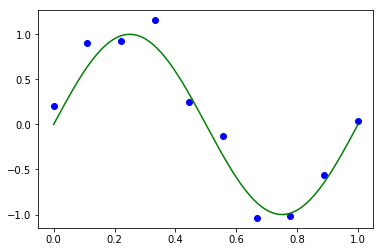

In [49]:
%matplotlib inline
import numpy as np
import sys
import matplotlib.pyplot as plt

#Xの値を0から1の間に指定し、等間隔な10この点をXに代入
X = np.linspace(0, 1, 10)
#Xの値の確認
print('X:', X)
#ガウス分布に従うノイズを生成　引数：(平均0、標準偏差、出力件数)
noise = np.random.normal(0, 0.2, X.size)
#サイン関数にノイズを加えたYを生成
Y = np.sin(2 * np.pi * X) + noise

#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
original = np.sin(2 * np.pi * cont_x)
#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.show()

In [50]:
###それぞれの関数の定義

#誤差関数(最小二乗法)をそれぞれの重み w[i](i = 1, 2,…,10)で微分し、
#その微分が0(誤差が最小)になるw[i]をそれぞれ求める。
def solve_for_W(X, M):
    #X_sumsは最小二乗法を行った後に、パラメータWの係数を(M+1, M+1)で表した行列
    X_sums = []
    for i in range(M + 1):
        for j in range(M + 1):
            X_sums.append(np.sum(X ** (i + j)))
    X_sums = np.reshape(X_sums, (M + 1, M + 1))
    #XY_sumsは最小二乗法を行った後に、パラメータWの無い項を(M+1, 1)で表した行列
    XY_sum = []
    for i in range(M + 1):
        XY_sum.append(np.sum(np.dot(X ** i, Y)))
    XY_sum = np.reshape(XY_sum, (M + 1, 1))

    # パラメータWは線形連立方程式の解
    W = np.linalg.solve(X_sums, XY_sum)
    #Wの値を確認
    print('Wの値(M={}のとき)：\n{}'.format(M, W))
    return W

#学習データの行列を作成(多項式のMが2のとき)
def to_matrix(x, M):
    terms_list = []
    for i in range(M + 1):
        if i == 0:
            terms_list.append(np.ones(x.shape[0]))
        else:
            term_i = x ** i
            terms_list.append(term_i)
    return np.vstack(terms_list).T

#多項式関数の定義
def f(x, w):
    return np.dot(x, w)

Wの値(M=0のとき)：
[[0.07237202]]


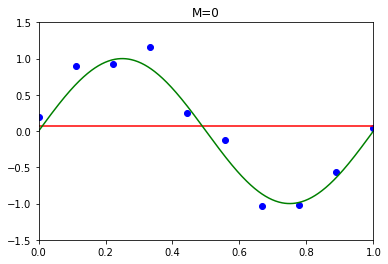

In [51]:
#M = 0のとき
M = 0
#重みパラメータWを求める
W = solve_for_W(X, M)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=0')
plt.show()

Wの値(M=1のとき)：
[[ 0.84549926]
 [-1.54625449]]


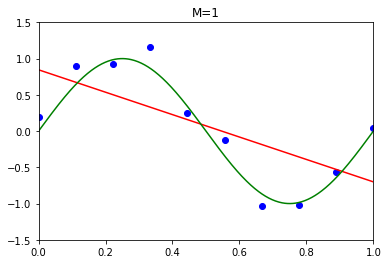

In [52]:
#M = 1のとき
M = 1
#重みパラメータWを求める
W = solve_for_W(X, M)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=1')
plt.show()

Wの値(M=3のとき)：
[[  0.15330268]
 [ 10.4545429 ]
 [-32.31574862]
 [ 21.82375396]]


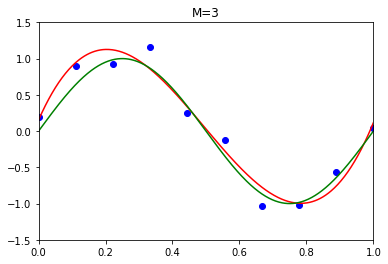

In [53]:
#M = 3のとき
M = 3
#重みパラメータWを求める
W = solve_for_W(X, M)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=3')
plt.show()

Wの値(M=9のとき)：
[[ 2.00331616e-01]
 [ 2.00694901e+02]
 [-4.39838191e+03]
 [ 3.87532589e+04]
 [-1.78989487e+05]
 [ 4.80420334e+05]
 [-7.76726222e+05]
 [ 7.45395155e+05]
 [-3.90847345e+05]
 [ 8.61918310e+04]]


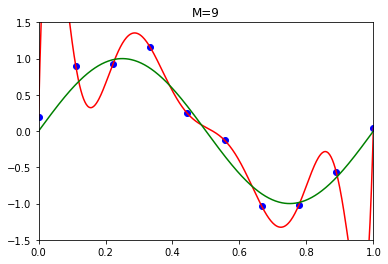

In [54]:
#M = 9のとき
M = 9
#重みパラメータWを求める
W = solve_for_W(X, M)

#ノイズありの10点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=9')
plt.show()

X: [0.         0.07142857 0.14285714 0.21428571 0.28571429 0.35714286
 0.42857143 0.5        0.57142857 0.64285714 0.71428571 0.78571429
 0.85714286 0.92857143 1.        ]
Wの値(M=9のとき)：
[[ 1.69836361e-01]
 [ 3.15541170e+01]
 [-4.81253730e+02]
 [ 2.91933318e+03]
 [-7.86571375e+03]
 [ 7.48920764e+03]
 [ 6.86851025e+03]
 [-2.19359389e+04]
 [ 1.82655095e+04]
 [-5.29161527e+03]]


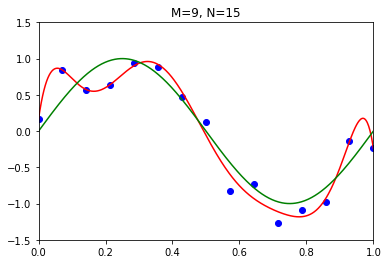

In [59]:
### M = 9 で N = 15のとき

#Xの値を0から1の間に指定し、等間隔な15この点をXに代入
X = np.linspace(0, 1, 15)
#Xの値の確認
print('X:', X)
#ガウス分布に従うノイズを生成　引数：(平均0、標準偏差、出力件数)
noise = np.random.normal(0, 0.2, X.size)
#サイン関数にノイズを加えたYを生成
Y = np.sin(2 * np.pi * X) + noise

#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
original = np.sin(2 * np.pi * cont_x)

#M = 9のとき
M = 9
#重みパラメータWを求める
W = solve_for_W(X, M)

#ノイズありの15点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=9, N=15')
plt.show()

X: [0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89

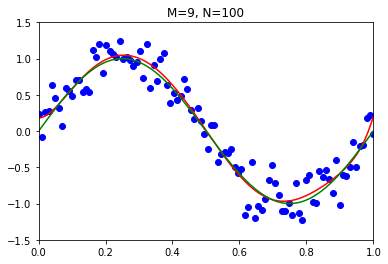

In [60]:
### M = 9 で N = 100のとき

#Xの値を0から1の間に指定し、等間隔な15この点をXに代入
X = np.linspace(0, 1, 100)
#Xの値の確認
print('X:', X)
#ガウス分布に従うノイズを生成　引数：(平均0、標準偏差、出力件数)
noise = np.random.normal(0, 0.2, X.size)
#サイン関数にノイズを加えたYを生成
Y = np.sin(2 * np.pi * X) + noise

#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
original = np.sin(2 * np.pi * cont_x)

#M = 9のとき
M = 9
#重みパラメータWを求める
W = solve_for_W(X, M)

#ノイズありの15点を青色でプロット
plt.plot(X, Y, 'bo')
##推定を行う関数のプロット
#元々のsin曲線と対比するための描画の準備
cont_x = np.linspace(0, 1, 500)
Mat_X = to_matrix(cont_x, M)
plt.plot(cont_x, f(Mat_X, W), '-r')
#元々のsin関数を緑の線でプロット
plt.plot(cont_x, original, '-g')
plt.xlim(0.0, 1.0)
plt.ylim(-1.5, 1.5)
plt.title('M=9, N=100')
plt.show()

<h1>Conclusions</h1>
When you set M too large, a prediction function(prediction model) becomes overfit to the observed data. The absolute values of each Wi for i = 0,1,2,…,M also becomes large when the number of M is larger. However, if you have large dataset such as N = 100 in the above case, the prediction model becomes close to the original sin curve even after you set M = 9.

<h1>結論</h1>
Mの値を過剰に大きくすれば、過学習が起こりやすくなる。そしてそれぞれのパラメータ Wi(for i = 0,1,2,…,M)の絶対値も大きくなる。ただし、データ数が多い場合(上の例で言うとN=100),M=9でも過学習はおこらず、元々のsin関数に近いモデルとなる。